# Chapter 9: Unsupervised Learning Techniques

## Introduction

This chapter explores various unsupervised learning algorithms that help discover hidden patterns in data without labeled outputs.


---

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs, load_digits, make_moons

In [3]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

---

## K-Means

K-Means is one of the most popular clustering algorithms. It partitions the data into K distinct, non-overlapping subsets (clusters) by minimizing the within-cluster variances.
K-Means is simple, efficient, and scalable, making it a good first algorithm to try for clustering tasks. However, it has limitations including sensitivity to initialization and a tendency to find spherical clusters of similar sizes.


### Hard vs Soft Clustering

When working with K-Means, we can distinguish between two approaches to cluster assignment:

#### Hard Clustering
Hard clustering assigns each instance to exactly one cluster - the one with the closest centroid. This is the standard approach in K-Means, resulting in a clear partitioning of the data.

In [5]:
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=42)

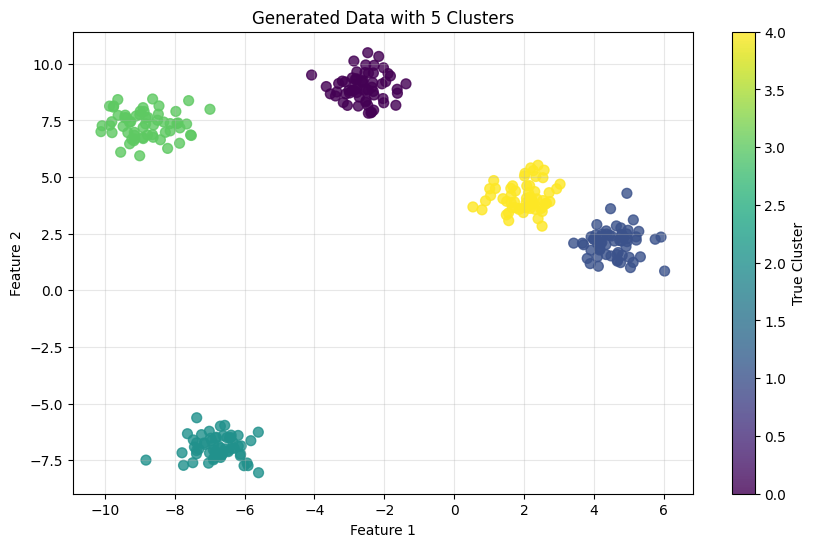

In [6]:
# Visualize the original data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.8)
plt.title('Generated Data with 5 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='True Cluster')
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
# Initialize and fit K-Means
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [8]:
# Get cluster labels and centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [9]:
# Hard clustering - predicting which cluster each instance belongs to
y_pred = kmeans.predict(X)

In [10]:
# Verify that predictions match the labels from fit
print(sum(y_pred == kmeans.labels_) == len(X))

True


In [11]:
# Display sample predictions
print(y_pred)

[3 4 3 0 3 1 4 2 1 4 0 3 0 3 4 3 0 0 4 3 3 0 3 4 4 3 2 4 0 2 1 4 4 1 2 0 0
 4 1 0 3 0 2 1 4 1 3 2 4 2 1 4 2 1 3 1 0 3 1 2 3 1 4 4 2 0 2 2 2 2 0 2 1 4
 1 3 1 1 4 3 2 3 3 4 3 2 1 0 0 4 4 4 3 4 3 3 4 1 0 4 1 1 0 2 3 3 3 0 3 0 1
 4 0 0 3 3 3 2 1 1 1 2 1 1 3 2 4 4 1 3 0 1 0 3 3 3 3 0 2 4 3 1 3 0 4 3 4 2
 0 2 0 2 2 0 3 4 2 1 3 0 1 1 4 0 3 1 4 4 0 4 2 3 0 0 3 0 1 0 2 2 1 1 0 2 2
 4 3 1 2 0 4 2 3 2 2 1 1 2 4 0 1 2 0 0 1 3 3 2 2 3 2 1 4 2 3 0 1 1 2 4 1 1
 4 1 4 0 1 4 1 4 1 0 0 2 4 0 0 0 4 3 1 0 2 4 2 1 4 4 2 2 0 4 1 2 1 4 2 4 2
 4 2 3 4 0 0 3 4 0 2 0 1 2 2 3 3 1 0 0 4 4 1 3 3 0 0 2 2 2 4 0 1 0 2 1 3 1
 2 3 4 3]


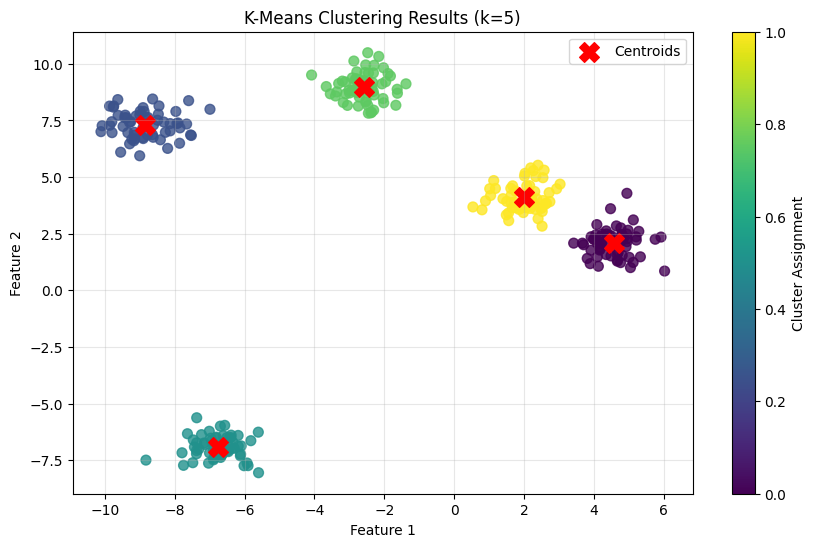

In [12]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering Results (k=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.colorbar(label='Cluster Assignment')
plt.show()

#### Soft Clustering

Soft clustering calculates the distance from each point to all cluster centroids, allowing us to measure the degree of membership to each cluster.

In [13]:
# Get distances from each point to all centroids
distances = kmeans.transform(X)

In [14]:
# The cluster with the smallest distance is the predicted cluster
print("First 5 distances to each centroid:")
print(distances[:5])

First 5 distances to each centroid:
[[ 9.21287431  7.68191357 16.93223945  1.22305639  6.05484922]
 [ 4.41141599 10.27765729 14.18421661  5.55560081  1.15047338]
 [ 9.02870871  6.48100608 15.40777781  1.14863703  5.76872982]
 [ 0.31950761 14.22277493 14.63376279  9.66896817  3.01923987]
 [10.57163451  5.82945584 16.43393255  0.73349967  7.31988424]]


In [15]:
# Verify that the minimum distance corresponds to the predicted cluster
print("Do minimum distances match predictions?")
print(np.argmin(distances[:5], axis=1) == y_pred[:5])

Do minimum distances match predictions?
[ True  True  True  True  True]


In [16]:
distances = kmeans.transform(X)

np.argmin(distances[:5], axis=1) == y_pred[:5]

array([ True,  True,  True,  True,  True])

### Centroids Initialization

The initial position of centroids can significantly affect the final clustering result, The quality and convergence speed of K-Means heavily depends on the initialization.


In [17]:
# Custom initialization of centroids
good_centroids = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=k, init=good_centroids, n_init=1, random_state=42) # By default n_init = 10

kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

### Performance Metrics

We can evaluate K-Means clustering using several metrics:

1. **Inertia** (within-cluster sum of squares): Measures how internally coherent clusters are
2. **Silhouette score**: Measures how similar an instance is to its own cluster compared to other clusters

In [18]:
# Calculate inertia (within-cluster sum of squares)
kmeans.inertia_

1762.102377575254

In [19]:
# scikit-learn provides a score method (negative inertia)
kmeans.score(X)   # Sci-kit learn rule 'greater is better'

-1762.102377575254

### Performance Metrics

In [20]:
kmeans.inertia_

1762.102377575254

In [21]:
kmeans.score(X)   # Sci-kit learn rule 'greater is better'

-1762.102377575254

### Accelerating K-Means

For large datasets, standard K-Means can be computationally expensive. MiniBatchKMeans provides a faster alternative by using mini-batches of data for each iteration.


In [22]:
# MiniBatchKMeans typically produces slightly worse results than standard KMeans
# but is much faster for large datasets

miniBatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
miniBatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

### Finding the Optimal K

Determining the optimal number of clusters is essential. Common methods include:

#### Elbow Method

The elbow method plots the inertia as a function of the number of clusters. The optimal k is often at the "elbow" point where adding more clusters yields diminishing returns.


In [23]:
# Calculate inertia for different values of k
results = []

for i in range(2, 10):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  results.append(kmeans.inertia_)

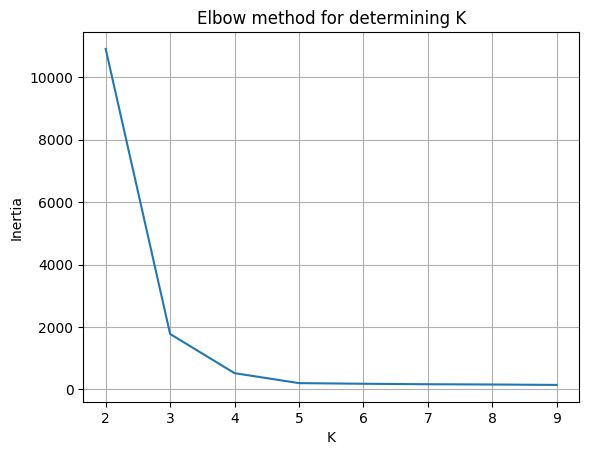

In [24]:
# Plot the elbow curve
import matplotlib.pyplot as plt

plt.plot(range(2, 10), results)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow method for determining K")
plt.grid()

#### Silhouette Score

The silhouette score measures how similar instances are to their assigned cluster compared to other clusters. Values closer to 1 indicate well-separated clusters.

In [25]:
results = []

for i in range(2, 10):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  results.append(silhouette_score(X, kmeans.labels_))

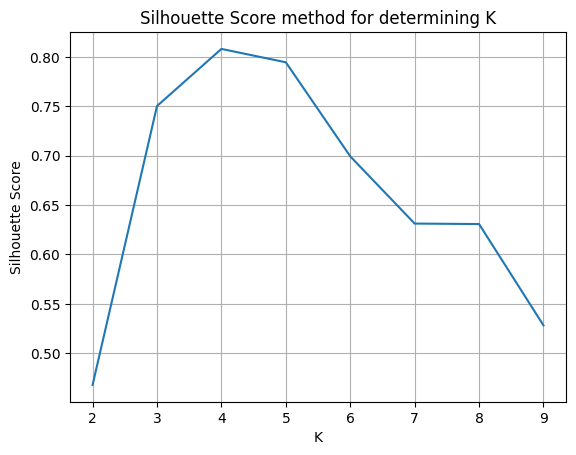

In [26]:
plt.plot(range(2, 10), results)
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score method for determining K")
plt.grid()

### Image Segmentation with K-Means

K-Means can be used for image segmentation by clustering pixels with similar colors. This reduces the number of colors in an image while preserving its visual structure.


In [27]:
# Load an image if available
try:
    image = np.asarray(PIL.Image.open('images/ladybug.jpg'))

    # Reshape the image for clustering (flatten all pixels into a list of RGB values)
    image_shape = image.shape
    image_reshaped = image.reshape(-1, 3)

    # Apply K-Means to segment the image into 6 color clusters
    kmeans = KMeans(6, random_state=42)
    kmeans.fit(image_reshaped)

    # Replace each pixel with its corresponding cluster center color
    image_segmented = kmeans.cluster_centers_[kmeans.labels_]
    image_segmented = image_segmented.reshape(image_shape)

    # Convert to uint8 for saving as image
    image_segmented = np.clip(image_segmented, 0, 255).astype(np.uint8)

    # Save the segmented image
    segmented_image = PIL.Image.fromarray(image_segmented, 'RGB')
    segmented_image.save('images/segmentation.png')
except Exception as e:
    print(f"Could not process image: {e}")

### Dimensionality Reduction with K-Means

K-Means can be used for dimensionality reduction by representing data points by their distances to cluster centroids.


In [28]:
# Load the digits dataset
X_digits, y_digits = load_digits(return_X_y=True)

In [29]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [30]:
# Train a baseline logistic regression model
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)
baseline_score = log_reg.score(X_test, y_test)
print(f"Baseline Logistic Regression accuracy: {baseline_score:.4f}")

Baseline Logistic Regression accuracy: 0.9733


In [31]:
# Create a pipeline with K-Means preprocessing and Logistic Regression
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(max_iter=10000, random_state=42))
])

In [32]:
# Train the pipeline
pipeline.fit(X_train, y_train)
pipeline_score = pipeline.score(X_test, y_test)
print(f"Pipeline with K-Means preprocessing accuracy: {pipeline_score:.4f}")
print(f"Error reduction: {(pipeline_score - baseline_score) / (1 - baseline_score):.2%}")

Pipeline with K-Means preprocessing accuracy: 0.9711
Error reduction: -8.33%


In [33]:
# Find the optimal number of clusters using GridSearchCV
param_grid = {'kmeans__n_clusters': [30, 50, 70, 90, 110]}
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': [30, 50, 70, 90, 110]},
             scoring='accuracy')

In [34]:
# Print the best parameters and score
print(f"Best number of clusters: {grid_search.best_params_['kmeans__n_clusters']}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
print(f"Test accuracy with optimal clusters: {grid_search.score(X_test, y_test):.4f}")

Best number of clusters: 90
Best cross-validation score: 0.9584
Test accuracy with optimal clusters: 0.9822


### Semi-Supervised Learning with K-Means

K-Means can be used for semi-supervised learning when we have limited labeled data.


In [35]:
# Simulate a scenario with limited labeled data
n_labeled = 50

In [36]:
# Train a model on just the labeled data
log_reg_limited = LogisticRegression(max_iter=10000, random_state=42)
log_reg_limited.fit(X_train[:n_labeled], y_train[:n_labeled])
limited_score = log_reg_limited.score(X_test, y_test)
print(f"Accuracy with only {n_labeled} labeled examples: {limited_score:.4f}")

Accuracy with only 50 labeled examples: 0.8267


In [37]:
# Perform K-Means clustering to find representative examples
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [38]:
# Find the indices of instances closest to each centroid
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
y_representative_digits = y_train[representative_digit_idx]

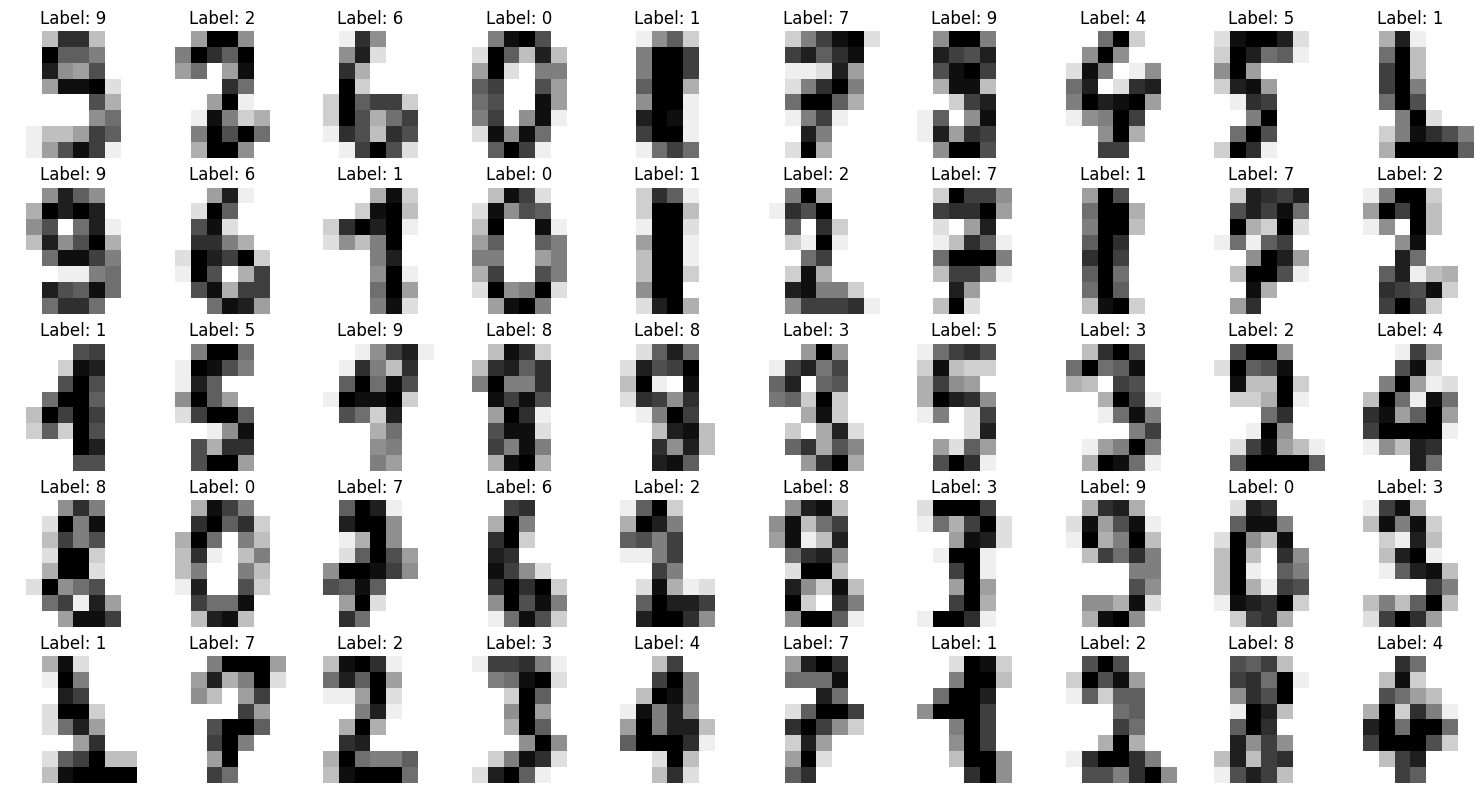

In [39]:
# Display the representative digits
plt.figure(figsize=(15, 8))
for i in range(min(k, 50)):  # Show up to 50 representative digits
    plt.subplot(5, 10, i + 1)
    plt.imshow(X_representative_digits[i].reshape(8, 8), cmap='binary')
    plt.title(f"Label: {y_representative_digits[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [40]:
# Train a model on the representative examples
log_reg_representative = LogisticRegression(max_iter=10000, random_state=42)
log_reg_representative.fit(X_representative_digits, y_representative_digits)
representative_score = log_reg_representative.score(X_test, y_test)
print(f"Accuracy with {k} representative examples: {representative_score:.4f}")

Accuracy with 50 representative examples: 0.9133


### K-Means for Label Propagation

We can propagate labels from representative examples to other instances in the same cluster.

In [41]:
# Propagate labels to all instances in each cluster
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [42]:
# Train a model on all instances with propagated labels
log_reg_propagated = LogisticRegression(max_iter=10000, random_state=42)
log_reg_propagated.fit(X_train, y_train_propagated)
propagated_score = log_reg_propagated.score(X_test, y_test)
print(f"Accuracy with all training data using propagated labels: {propagated_score:.4f}")

Accuracy with all training data using propagated labels: 0.9222


In [43]:
# Only propagate labels to instances close to the centroids (most confident assignments)
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
partially_propagated = np.zeros(len(X_train), dtype=bool)

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    partially_propagated[in_cluster] = (X_cluster_dist[in_cluster] <= cutoff_distance)

X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [44]:
# Train a model on the partially propagated dataset
log_reg_partial = LogisticRegression(max_iter=10000, random_state=42)
log_reg_partial.fit(X_train_partially_propagated, y_train_partially_propagated)
partial_score = log_reg_partial.score(X_test, y_test)
print(f"Accuracy with partial label propagation (top {percentile_closest}%): {partial_score:.4f}")

Accuracy with partial label propagation (top 20%): 0.9133


In [45]:
# Calculate the accuracy of the propagated labels compared to true labels
propagation_accuracy = np.mean(y_train_partially_propagated == y_train[partially_propagated])
print(f"Accuracy of propagated labels: {propagation_accuracy:.4f}")

Accuracy of propagated labels: 0.9863


---

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**DBSCAN defines clusters as continuous regions of high density.**

**Notice** also that DBSCAN Works well when clusters are dense and separated by low-density regions.

### Core mechanics:
- Counts instances within ε-neighborhood (distance ε from each point)
- Core instances have at least min_samples points in their neighborhood
- Connected core instances form a single cluster
- Non-core instances without core neighbors are anomalies (-1 label)

In [58]:
X, y = make_moons(n_samples=1000, noise=0.05)     # Moons Dataset

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [74]:
dbscan = DBSCAN(eps=0.05, min_samples=5)  # eps controls neighborhood size, min_samples defines density threshold
dbscan.fit(X_train)  # Performs clustering

DBSCAN(eps=0.05)

In [109]:
# Reviewing core samples and their cluster label
core_samples_df = pd.DataFrame({
    'X_cordinate': dbscan.components_[:, 0],
    'y_cordinate': dbscan.components_[:, 1],
    'cluster': dbscan.labels_[dbscan.core_sample_indices_]
    })

core_samples_df.head()

,X_cordinate,y_cordinate,cluster
0,1.123937,-0.484007,0
1,1.791365,-0.135560,1
2,0.333628,0.863812,2
3,1.814355,-0.011925,1
4,0.868404,-0.472887,0


### Key attributes:
- labels_: Cluster assignments (-1 for anomalies)
- core_sample_indices_: Indices of core points
- components_: The core points themselves



**DBSCAN lacks predict() but has fit_predict() - requires custom implementation for new data classification.**

In [75]:
# Prediction for new points can be implemented using KNN:
# Train KNN on core points
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [76]:
# Predict cluster for new points
knn.predict(X_test)  # Returns cluster labels

array([ 7,  0,  3,  7,  9,  1,  1,  4,  4,  9,  1,  9,  0,  6,  4,  0,  6,
        3,  6,  0,  0,  0,  4,  6,  5,  1,  3,  0,  0,  4,  0,  2,  0,  1,
        3,  9,  6,  6,  6,  2,  4,  4,  0,  9,  6,  1,  0,  3,  0, 10,  1,
        7,  0,  0,  0,  1,  6,  6,  0,  5,  0,  5,  9,  4,  2,  0,  4, 10,
        7,  0,  5,  0,  0,  1,  0,  0,  9,  0,  0,  1,  0,  9,  6,  0,  3,
        0,  7,  1,  0,  1,  0,  6,  5,  0,  0,  0,  9,  9,  1, 10])

In [79]:
# Custom anomaly detection for new points using neighbors distance:
# Get distances to nearest neighbors
y_dist, y_pred_idx = knn.kneighbors(X_test, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.05] = -1  # Mark points beyond threshold as anomalies

In [82]:
y_pred[y_pred < 0]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

### DBSCAN advantages:
- simple
- powerful
- identifies any number of clusters
- robust to outliers.


### Limitations:
- struggles when density varies significantly across clusters.

- has a computational complexity of ~O(m log m), but may require O(m²) memory with large eps.

---